In [1]:
import pandas as pd

In [2]:
Income = [80, 100, 120, 140, 160, 180, 200, 220, 240, 260]
Expend = [70, 65, 90, 95, 110, 115, 120, 140, 155, 150]


In [3]:
df1 = pd.DataFrame(
 {
   "Income": Income
 , "Expend": Expend
 }
 )


In [4]:
print(df1)

   Income  Expend
0      80      70
1     100      65
2     120      90
3     140      95
4     160     110
5     180     115
6     200     120
7     220     140
8     240     155
9     260     150


In [5]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.scatter(
  x      = "Income"
, y      = "Expend"
, color  = "green"
, marker = "o"
, data   = df1
)
plt.title("Scatter plot of Weekly Income (\$) and Weekly Expenditures (\$)")
plt.xlabel("Weekly Income (\$)")
plt.ylabel("Weekly Expenditures (\$)")


<Figure size 640x480 with 1 Axes>

In [6]:
plt.show()

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Reg1 = ols(formula = "Expend ~ Income", data = df1)
Fit1 = Reg1.fit()

print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Expend   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.75e-07
Time:                        10:14:46   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

C:\Users\iteofil1\.conda\envs\launchpad\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [8]:
print(Fit1.params)

Intercept    24.454545
Income        0.509091
dtype: float64


In [9]:
print(Fit1.fittedvalues)

0     65.181818
1     75.363636
2     85.545455
3     95.727273
4    105.909091
5    116.090909
6    126.272727
7    136.454545
8    146.636364
9    156.818182
dtype: float64


In [10]:
print(Fit1.resid)

0     4.818182
1   -10.363636
2     4.454545
3    -0.727273
4     4.090909
5    -1.090909
6    -6.272727
7     3.545455
8     8.363636
9    -6.818182
dtype: float64


In [11]:
print(Fit1.bse)

Intercept    6.413817
Income       0.035743
dtype: float64


In [12]:
print(Fit1.centered_tss)

8890.0


In [13]:
print(anova_lm(Fit1))

           df       sum_sq      mean_sq           F        PR(>F)
Income    1.0  8552.727273  8552.727273  202.867925  5.752746e-07
Residual  8.0   337.272727    42.159091         NaN           NaN


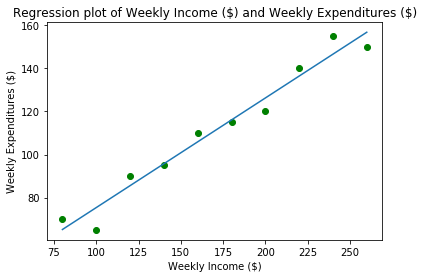

In [14]:
fig = plt.figure()
plt.scatter(
  x      = "Income"
, y      = "Expend"
, color  = "green"
, marker = "o" 
, data   = df1
)
plt.plot(df1["Income"], Fit1.fittedvalues)
plt.title("Regression plot of Weekly Income (\$) and Weekly Expenditures (\$)")
plt.xlabel("Weekly Income (\$)")
plt.ylabel("Weekly Expenditures (\$)")
plt.show()